<a href="https://colab.research.google.com/github/Leelakrishna178/SDN-Traffic-Engineering/blob/main/Mini-II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install tensorflow

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import pickle

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Show plots inline
%matplotlib inline

In [ ]:
ping_df = pd.read_csv('/content/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/content/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/content/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/content/telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)

In [ ]:
print(df.shape)

(5242, 13)


In [ ]:
df.describe()

,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second
count,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000
mean,7.814765,682.359214,7.763640,6.094360,677.842999,530.202926,17.525754,2070.781000,17.447921,15.710718,2064.795498,1943.829194
std,27.445539,2417.020821,27.343341,10.656380,2407.997270,937.773493,31.726859,3404.747532,31.645749,18.427478,3401.356026,2739.969899
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.909309,0.000000,62.009611,1.000000,71.000000,1.000000,1.020725,71.000000,98.670691
50%,1.000000,66.000000,1.000000,1.021459,66.000000,98.762821,1.000000,98.000000,1.000000,1.430508,98.000000,192.470941
75%,1.000000,98.000000,1.000000,1.038462,98.000000,99.485632,37.000000,3696.000000,37.000000,34.969697,3541.000000,2313.000000
max,211.000000,18581.000000,211.000000,76.750000,18581.000000,6711.000000,210.000000,15484.000000,210.000000,76.500000,15484.000000,7054.188679


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5242 entries, 0 to 5242
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Delta Forward Packets                          5242 non-null   int64  
 1   Delta Forward Bytes                            5242 non-null   int64  
 2   Forward Instantaneous Packets per Second       5242 non-null   float64
 3   Forward Average Packets per second             5242 non-null   float64
 4   Forward Instantaneous Bytes per Second         5242 non-null   float64
 5   Forward Average Bytes per second               5242 non-null   float64
 6   Delta Reverse Packets                          5242 non-null   float64
 7   Delta Reverse Bytes                            5242 non-null   float64
 8   DeltaReverse Instantaneous Packets per Second  5242 non-null   float64
 9   Reverse Average Packets per second             5242 non-n

In [ ]:
df['Traffic Type'] = df['Traffic Type'].astype('category')

In [ ]:
df['Traffic Type'].cat.categories

Index(['dns', 'ping', 'telnet', 'voice'], dtype='object')

In [ ]:
df['Traffic Type'].cat.codes.head()

,0
0,1
1,1
2,1
3,1
4,1


In [ ]:
print('Features:',df.columns[:-1].values)

Features: ['Delta Forward Packets' 'Delta Forward Bytes'
 'Forward Instantaneous Packets per Second'
 'Forward Average Packets per second'
 'Forward Instantaneous Bytes per Second'
 'Forward Average Bytes per second' 'Delta Reverse Packets'
 'Delta Reverse Bytes' 'DeltaReverse Instantaneous Packets per Second'
 'Reverse Average Packets per second'
 'Reverse Instantaneous Bytes per Second'
 'Reverse Average Bytes per second']


In [ ]:
print ('Value counts:')
df['Traffic Type'].value_counts()

Value counts:


,count
Traffic Type,
ping,1770
telnet,1181
dns,1154
voice,1137


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Example DataFrame assumed
# df = ...

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Traffic Type'])  # Convert categorical labels to integers

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Traffic Type', axis=1))  # Drop target column and scale features

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
predictions = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.4f' % (accuracy * 100))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print precision, recall, and F1-score
print('Precision: %.6f' % precision)
print('Recall: %.6f' % recall)
print('F1-Score: %.6f' % f1)


Accuracy: 98.7285
Precision: 0.987571
Recall: 0.987285
F1-Score: 0.987215


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder


# model = SGDClassifier(loss='log', max_iter=1000, tol=1e-3)  # Here, max_iter acts like the number of epochs

# Example DataFrame assumed
# df = ...

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Traffic Type'])  # Convert categorical labels to integers

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Traffic Type', axis=1))  # Drop target column and scale features

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
predictions = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, predictions, target_names=label_encoder.classes_)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         dns       1.00      0.95      0.97       354
        ping       0.97      1.00      0.98       525
      telnet       0.99      1.00      1.00       346
       voice       1.00      0.99      1.00       348

    accuracy                           0.99      1573
   macro avg       0.99      0.99      0.99      1573
weighted avg       0.99      0.99      0.99      1573



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize model with warm_start=True to retain previous iteration state
model = LogisticRegression(max_iter=1, warm_start=True, solver='saga')

# Arrays to store accuracy
epoch_accuracies = []

# Train iteratively and calculate accuracy at each step
for epoch in range(1, 25):  # Simulating 5 epochs
    model.max_iter = epoch  # Set max iterations to current epoch
    model.fit(X_train, y_train)  # Train model
    predictions = model.predict(X_test)  # Predict on test set
    acc = accuracy_score(y_test, predictions)  # Calculate accuracy
    epoch_accuracies.append(acc)  # Store accuracy for this epoch

print("Logistic Regression Accuracy over epochs:", epoch_accuracies)


Logistic Regression Accuracy over epochs: [0.77177368086459, 0.7724094087730451, 0.7813095994914177, 0.7870311506675143, 0.8041958041958042, 0.8442466624284806, 0.8696757787666879, 0.8798474253019708, 0.8811188811188811, 0.8906547997457088, 0.8900190718372537, 0.9529561347743166, 0.9783852511125238, 0.9809281627463445, 0.9821996185632549, 0.9834710743801653, 0.9841068022886205, 0.9841068022886205, 0.9841068022886205, 0.9847425301970757, 0.9847425301970757, 0.9847425301970757, 0.9853782581055308, 0.9853782581055308]


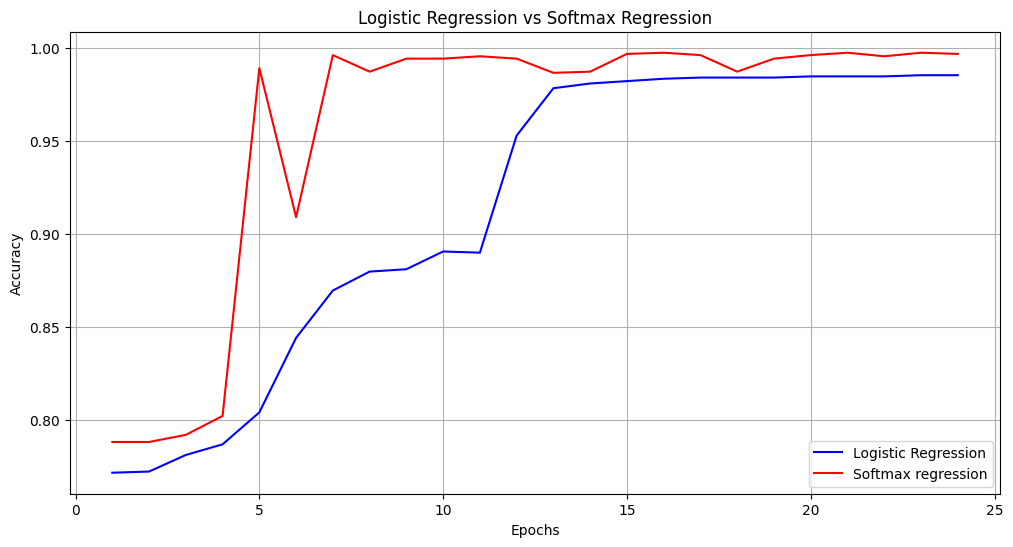

In [ ]:
import matplotlib.pyplot as plt

# Logistic Regression Accuracy (training and validation)
logistic_regression = [0.77177368086459, 0.7724094087730451, 0.7813095994914177, 0.7870311506675143, 0.8041958041958042,
                       0.8442466624284806, 0.8696757787666879, 0.8798474253019708, 0.8811188811188811, 0.8906547997457088,
                       0.8900190718372537, 0.9529561347743166, 0.9783852511125238, 0.9809281627463445, 0.9821996185632549,
                       0.9834710743801653, 0.9841068022886205, 0.9841068022886205, 0.9841068022886205, 0.9847425301970757,
                       0.9847425301970757, 0.9847425301970757, 0.9853782581055308, 0.9853782581055308]
softmax_regression =  [0.7883026003837585, 0.7883026003837585, 0.7921169996261597, 0.8022885918617249, 0.9891926050186157,
                       0.9090909361839294, 0.9961856603622437, 0.9872854351997375, 0.9942784309387207, 0.9942784309387207,
                       0.9955499172210693, 0.9942784309387207, 0.9866496920585632, 0.9872854351997375, 0.9968213438987732,
                       0.9974570870399475, 0.9961856603622437, 0.9872854351997375, 0.9942784309387207, 0.9961856603622437,
                       0.9974570870399475, 0.9955499172210693, 0.9974570870399475, 0.9968213438987732, 0.9942784309387207]

# Trim both lists to the minimum length
min_length = min(len(logistic_regression), len(softmax_regression))
logistic_regression = logistic_regression[:min_length]
softmax_regression = softmax_regression[:min_length]

# Adjust epochs accordingly
epochs = range(1, min_length + 1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(epochs, logistic_regression, label='Logistic Regression', color='blue')
plt.plot(epochs, softmax_regression, label='Softmax regression', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Logistic Regression vs Softmax Regression')
plt.legend()
plt.grid(True)
plt.savefig('graph_image.png', dpi=300)
plt.show()


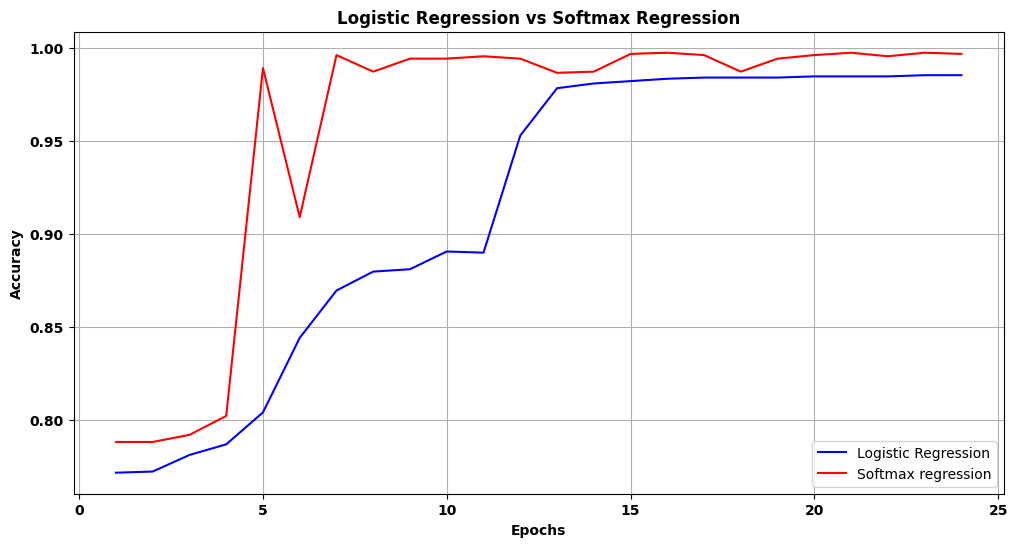

In [ ]:
import matplotlib.pyplot as plt

# Logistic Regression Accuracy (training and validation)
logistic_regression = [0.77177368086459, 0.7724094087730451, 0.7813095994914177, 0.7870311506675143, 0.8041958041958042,
                       0.8442466624284806, 0.8696757787666879, 0.8798474253019708, 0.8811188811188811, 0.8906547997457088,
                       0.8900190718372537, 0.9529561347743166, 0.9783852511125238, 0.9809281627463445, 0.9821996185632549,
                       0.9834710743801653, 0.9841068022886205, 0.9841068022886205, 0.9841068022886205, 0.9847425301970757,
                       0.9847425301970757, 0.9847425301970757, 0.9853782581055308, 0.9853782581055308]
softmax_regression =  [0.7883026003837585, 0.7883026003837585, 0.7921169996261597, 0.8022885918617249, 0.9891926050186157,
                       0.9090909361839294, 0.9961856603622437, 0.9872854351997375, 0.9942784309387207, 0.9942784309387207,
                       0.9955499172210693, 0.9942784309387207, 0.9866496920585632, 0.9872854351997375, 0.9968213438987732,
                       0.9974570870399475, 0.9961856603622437, 0.9872854351997375, 0.9942784309387207, 0.9961856603622437,
                       0.9974570870399475, 0.9955499172210693, 0.9974570870399475, 0.9968213438987732, 0.9942784309387207]

# Trim both lists to the minimum length
min_length = min(len(logistic_regression), len(softmax_regression))
logistic_regression = logistic_regression[:min_length]
softmax_regression = softmax_regression[:min_length]

# Adjust epochs accordingly
epochs = range(1, min_length + 1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(epochs, logistic_regression, label='Logistic Regression', color='blue')
plt.plot(epochs, softmax_regression, label='Softmax regression', color='red')

# Make x and y labels bold
plt.xlabel('Epochs', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')

# Make the x-axis tick labels bold
plt.xticks(fontweight='bold')

# Make the x-axis tick labels bold
plt.yticks(fontweight='bold')

#plt.title('Logistic Regression vs Softmax Regression')
# Make the title bold
plt.title('Logistic Regression vs Softmax Regression', fontweight='bold')
plt.legend()
plt.grid(True)
plt.savefig('graph_image.png', dpi=300)
plt.show()


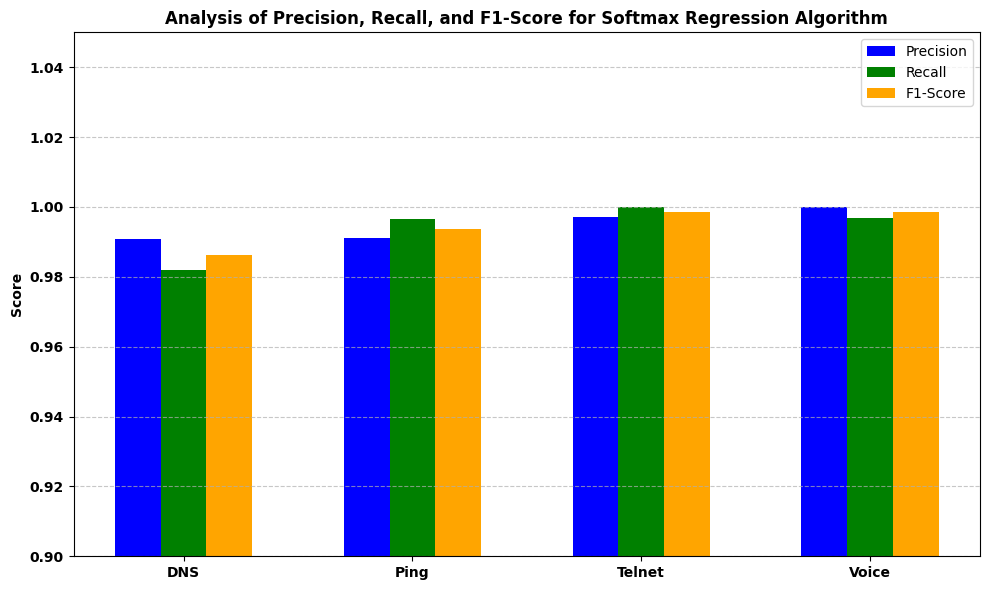

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
classes = ['DNS', 'Ping', 'Telnet', 'Voice']
precision = [0.990881, 0.991103, 0.997175, 1.000000]
recall = [0.981928, 0.996422, 1.000000, 0.996960]
f1_score = [0.986384, 0.993756, 0.998586, 0.998478]
#support = [332, 559, 353, 329]


# Set width of bars
bar_width = 0.2
x = np.arange(len(classes))

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, precision, width=bar_width, label='Precision', color='blue')
plt.bar(x, recall, width=bar_width, label='Recall', color='green')
plt.bar(x + bar_width, f1_score, width=bar_width, label='F1-Score', color='orange')

# Add support as text on top of the bars
#for i in range(len(support)):
#    plt.text(x[i], max(precision[i], recall[i], f1_score[i]) + 0.01, f'Support: {support[i]}', ha='center', fontsize=10)

# Customize plot
plt.xticks(x, classes, fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Analysis of Precision, Recall, and F1-Score for Softmax Regression Algorithm', fontweight='bold')
plt.ylim(0.9, 1.05)  # Set y-axis limit for better visibility
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig('graph_image1.png', dpi=300)
plt.show()


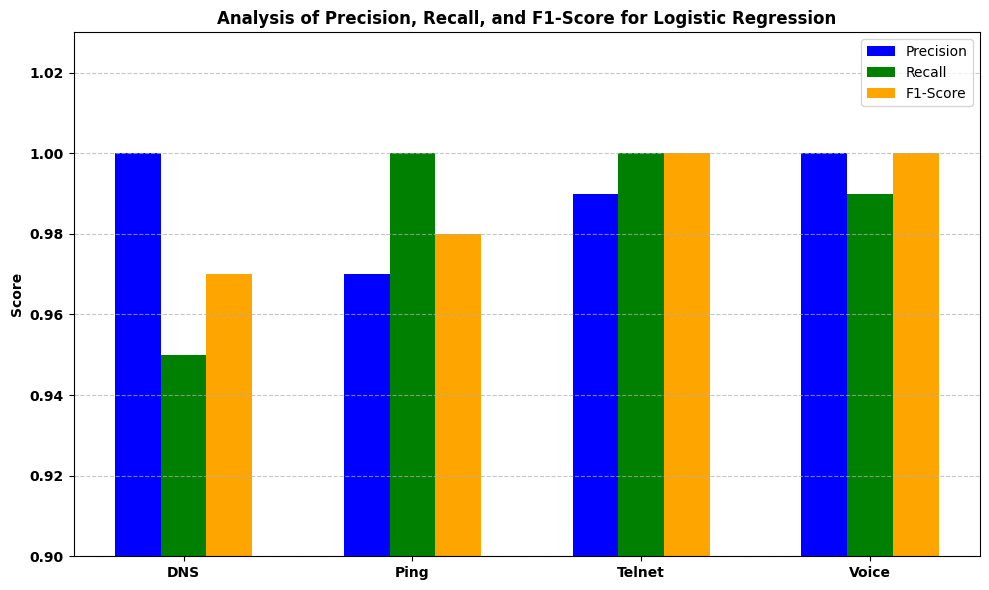

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
classes = ['DNS', 'Ping', 'Telnet', 'Voice']
precision = [1.00,0.97, 0.99, 1.00]
recall = [0.95, 1.00, 1.00, 0.99]
f1_score = [0.97, 0.98, 1.00, 1.00]
#support = [332, 559, 353, 329]

# Set width of bars
bar_width = 0.2
x = np.arange(len(classes))

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, precision, width=bar_width, label='Precision', color='blue')
plt.bar(x, recall, width=bar_width, label='Recall', color='green')
plt.bar(x + bar_width, f1_score, width=bar_width, label='F1-Score', color='orange')

# Add support as text on top of the bars
#for i in range(len(support)):
#    plt.text(x[i], max(precision[i], recall[i], f1_score[i]) + 0.01, f'Support: {support[i]}', ha='center', fontsize=10)

# Customize plot
plt.xticks(x, classes, fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Analysis of Precision, Recall, and F1-Score for Logistic Regression', fontweight='bold')
plt.ylim(0.9, 1.03)  # Set y-axis limit for better visibility
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig('graph_image2.png', dpi=300)
plt.show()

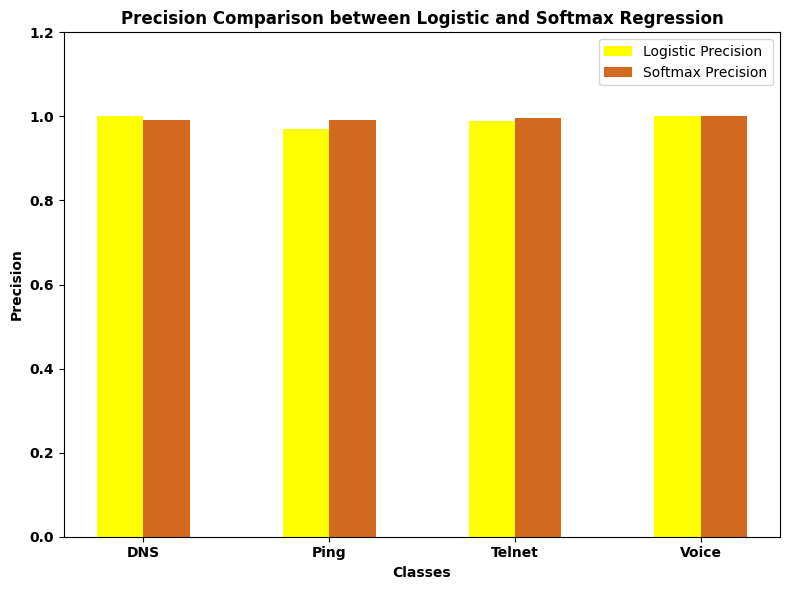

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for Softmax Regression and Logistic Regression
classes = ['DNS', 'Ping', 'Telnet', 'Voice']

# Softmax Regression precision
softmax_precision = [0.990881, 0.991103, 0.997175, 1.000000]

# Logistic Regression precision
logistic_precision = [1.00, 0.97, 0.99, 1.00]

# Set positions for the bars
x = np.arange(len(classes))  # the label locations
width = 0.25  # the width of the bars

# Plot Precision Comparison
plt.figure(figsize=(8, 6))
plt.bar(x - width / 2, logistic_precision, width, label='Logistic Precision', color='yellow')
plt.bar(x + width / 2, softmax_precision, width, label='Softmax Precision', color='chocolate')
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Precision', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Precision Comparison between Logistic and Softmax Regression', fontweight='bold')
plt.xticks(x, classes, fontweight='bold')
plt.ylim(0, 1.2)
plt.legend()
plt.tight_layout()

# Save the Precision Comparison plot
plt.savefig('precision_comparison.png')  # Clear the current figure
plt.show()


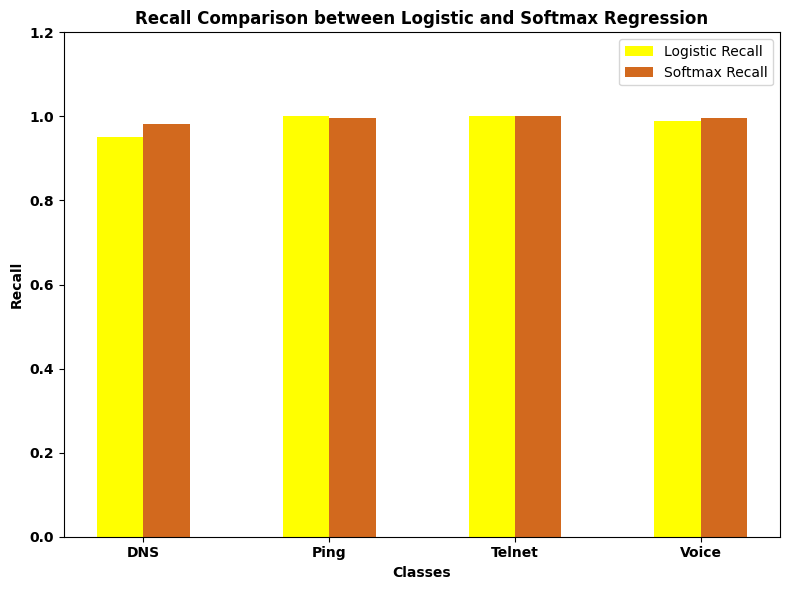

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for Softmax Regression and Logistic Regression
classes = ['DNS', 'Ping', 'Telnet', 'Voice']

# Softmax Regression metrics
softmax_precision = [0.990881, 0.991103, 0.997175, 1.000000]
softmax_recall = [0.981928, 0.996422, 1.000000, 0.996960]
softmax_f1_score = [0.986384, 0.993756, 0.998586, 0.998478]

# Logistic Regression metrics
logistic_precision = [1.00, 0.97, 0.99, 1.00]
logistic_recall = [0.95, 1.00, 1.00, 0.99]
logistic_f1_score = [0.97, 0.98, 1.00, 1.00]

# Set positions for the bars
x = np.arange(len(classes))  # the label locations
width = 0.25  # the width of the bars

# Plot: Recall Comparison
plt.figure(figsize=(8, 6))
plt.bar(x - width / 2, logistic_recall, width, label='Logistic Recall', color='yellow')
plt.bar(x + width / 2, softmax_recall, width, label='Softmax Recall', color='chocolate')
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Recall', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Recall Comparison between Logistic and Softmax Regression', fontweight='bold')
plt.xticks(x, classes)
plt.ylim(0, 1.2)
plt.legend()
plt.tight_layout()

# Save and download the plot
plt.savefig("recall_comparison_logistic_first.png")

# Show the plot
plt.show()


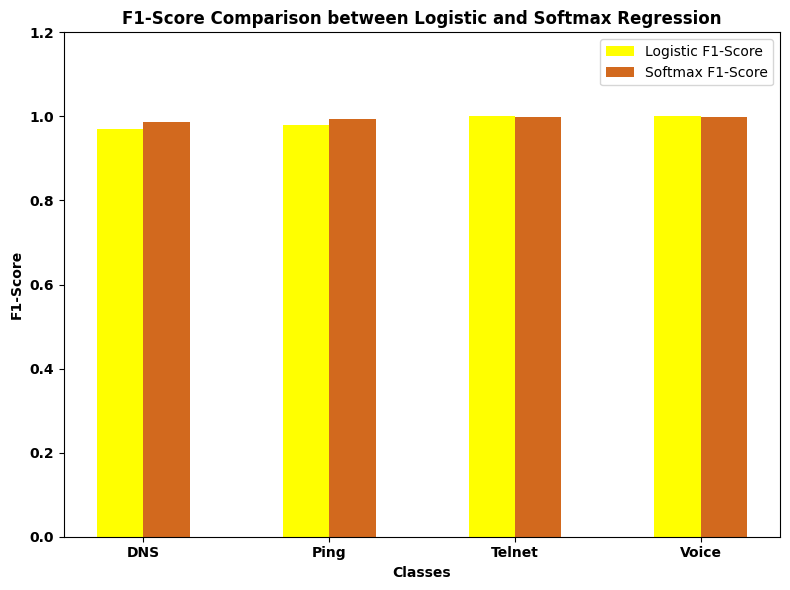

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for Softmax Regression and Logistic Regression
classes = ['DNS', 'Ping', 'Telnet', 'Voice']

# Softmax Regression metrics
softmax_precision = [0.990881, 0.991103, 0.997175, 1.000000]
softmax_recall = [0.981928, 0.996422, 1.000000, 0.996960]
softmax_f1_score = [0.986384, 0.993756, 0.998586, 0.998478]

# Logistic Regression metrics
logistic_precision = [1.00, 0.97, 0.99, 1.00]
logistic_recall = [0.95, 1.00, 1.00, 0.99]
logistic_f1_score = [0.97, 0.98, 1.00, 1.00]

# Set positions for the bars
x = np.arange(len(classes))  # the label locations
width = 0.25  # the width of the bars

# Plot: F1-Score Comparison
plt.figure(figsize=(8, 6))
plt.bar(x - width / 2, logistic_f1_score, width, label='Logistic F1-Score', color='yellow')
plt.bar(x + width / 2, softmax_f1_score, width, label='Softmax F1-Score', color='chocolate')
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('F1-Score', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('F1-Score Comparison between Logistic and Softmax Regression', fontweight='bold')
plt.xticks(x, classes)
plt.ylim(0, 1.2)
plt.legend()
plt.tight_layout()

# Save and download the plot
plt.savefig("f1_score_comparison_logistic_first.png")

# Show the plot
plt.show()
